Problem 1

(b)计算众数与中位数

In [52]:
!pip install pytesseract
import numpy as np
from scipy.optimize import minimize_scalar
from scipy import stats
from scipy.optimize import bisect
from scipy.optimize import minimize
from scipy.stats import multivariate_normal, norm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pytesseract
from PIL import Image

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [54]:
# 方案1：检查并设置中文字体
def setup_chinese_font():
    """设置中文字体支持"""
    # 查看系统可用中文字体
    chinese_fonts = [f.name for f in fm.fontManager.ttflist if '宋体' in f.name or '黑体' in f.name or '微软' in f.name]
    print("可用的中文字体:", chinese_fonts)
    
    # 设置中文字体（按优先级尝试）
    font_options = ['SimHei', 'Microsoft YaHei', 'SimSun', 'DejaVu Sans']
    for font in font_options:
        try:
            plt.rcParams['font.sans-serif'] = [font]
            plt.rcParams['axes.unicode_minus'] = False
            print(f"✓ 成功设置字体: {font}")
            return True
        except:
            continue
    
    print("✗ 未找到合适的中文字体，需要安装")
    return False
if not setup_chinese_font():
    install_chinese_font()

可用的中文字体: []
✓ 成功设置字体: SimHei


In [56]:
!pip install opencv-python
import pytesseract
from PIL import Image
import cv2
import numpy as np

def enhance_chinese_ocr(image_path):
    """专门优化中文OCR识别"""
    try:
        # 读取图像
        image = Image.open(image_path)
        
        # 转换为OpenCV格式进行预处理
        img_cv = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
        
        # 专门针对中文的预处理流程
        processed_img = preprocess_for_chinese(img_cv)
        
        # 使用中文语言包进行OCR
        custom_config = r'--oem 3 --psm 6 -c tessedit_char_whitelist=0123456789.abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ中文汉字'
        
        text = pytesseract.image_to_string(processed_img, lang='chi_sim', config=custom_config)
        
        return text
    except Exception as e:
        print(f"OCR处理错误: {e}")
        return None

def preprocess_for_chinese(image):
    """专门针对中文识别的图像预处理"""
    # 1. 转换为灰度图
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 2. 中文字符需要更高的对比度
    # 使用CLAHE增强对比度（对中文笔画特别有效）
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(gray)
    
    # 3. 针对中文的锐化处理
    kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
    sharpened = cv2.filter2D(enhanced, -1, kernel)
    
    # 4. 中文字符通常需要更精细的二值化
    # 使用自适应阈值
    binary = cv2.adaptiveThreshold(sharpened, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                 cv2.THRESH_BINARY, 11, 2)
    
    # 5. 降噪处理（中文字符笔画复杂，需要谨慎降噪）
    denoised = cv2.medianBlur(binary, 3)
    
    return denoised

  You can safely remove it manually.
  You can safely remove it manually.


  Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.2.6-cp313-cp313-win_amd64.whl.metadata (60 kB)
Using cached opencv_python-4.12.0.88-cp37-abi3-win_amd64.whl (39.0 MB)
Using cached numpy-2.2.6-cp313-cp313-win_amd64.whl (12.6 MB)

  Attempting uninstall: numpy

    Found existing installation: numpy 2.3.2

    Uninstalling numpy-2.3.2:

      Successfully uninstalled numpy-2.3.2

   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   ---------------------------------------- 0/2 [numpy]
   --

计算众数

In [ ]:
#定义密度函数
def p(x1):
    # 第一个高斯成分：N(10, 1)
    comp1 = 0.4 * norm.pdf(x1, loc=10, scale=1)
    # 第二个高斯成分：N(0, 8.4)  
    comp2 = 0.6 * norm.pdf(x1, loc=0, scale=np.sqrt(8.4))
    return comp1 + comp2

In [31]:
# 由于我们要找最大值，但优化器通常找最小值，所以定义负函数
def negative_p(x1):
    return -p(x1)

In [33]:
#多初始点优化
initial_points = [0, 5, 10, 15]  # 在可能区域设置多个初始点

best_x = None
best_pdf = -np.inf

for x0 in initial_points:
    # 使用更稳健的优化方法
    result = minimize(negative_p, x0, method='BFGS')
    
    if result.success:
        current_pdf = p(result.x[0])
        print(f"初始点 {x0}: 找到众数 x = {result.x[0]:.6f}, p(x) = {current_pdf:.6f}")
        
        if current_pdf > best_pdf:
            best_pdf = current_pdf
            best_x = result.x[0]

print(f"最佳众数: x = {best_x:.6f}, p(x) = {best_pdf:.6f}")

初始点 0: 找到众数 x = 0.000000, p(x) = 0.082589
初始点 5: 找到众数 x = 0.000528, p(x) = 0.082589
初始点 10: 找到众数 x = 9.998395, p(x) = 0.159792
初始点 15: 找到众数 x = 15.000000, p(x) = 0.000001
最佳众数: x = 9.998395, p(x) = 0.159792


In [35]:
#对x2同理
def p(x2):
    # 第一个高斯成分：N(10, 1)
    comp1 = 0.4 * norm.pdf(x2, loc=2, scale=1)
    # 第二个高斯成分：N(0, 8.4)  
    comp2 = 0.6 * norm.pdf(x2, loc=0, scale=np.sqrt(1.7))
    return comp1 + comp2
def negative_p(x2):
    return -p(x2)
initial_points = [0, 1, 2]  # 在可能区域设置多个初始点

best_x = None
best_pdf = -np.inf

for x0 in initial_points:
    # 使用更稳健的优化方法
    result = minimize(negative_p, x0, method='BFGS')
    
    if result.success:
        current_pdf = p(result.x[0])
        print(f"初始点 {x0}: 找到众数 x = {result.x[0]:.6f}, p(x) = {current_pdf:.6f}")
        
        if current_pdf > best_pdf:
            best_pdf = current_pdf
            best_x = result.x[0]

print(f"最佳众数: x = {best_x:.6f}, p(x) = {best_pdf:.6f}")

初始点 0: 找到众数 x = 1.330791, p(x) = 0.236611
初始点 1: 找到众数 x = 1.330784, p(x) = 0.236611
初始点 2: 找到众数 x = 1.330861, p(x) = 0.236611
最佳众数: x = 1.330791, p(x) = 0.236611


计算中位数

In [9]:
# 定义x₁边缘分布的参数
mu1_x1, sigma1_x1 = 10, 1.0
mu2_x1, sigma2_x1 = 0.0, np.sqrt(8.4)
weight1_x1, weight2_x1 = 0.4, 0.6

# 定义x₂边缘分布的参数
mu1_x2, sigma1_x2 = 2.0, 1.0
mu2_x2, sigma2_x2 = 0.0, np.sqrt(1.7)
weight1_x2, weight2_x2 = 0.4, 0.6

In [10]:
# 创建正态分布的随机变量对象
rv1_x1 = stats.norm(mu1_x1, sigma1_x1)
rv2_x1 = stats.norm(mu2_x1, sigma2_x1)
rv1_x2 = stats.norm(mu1_x2, sigma1_x2)
rv2_x2 = stats.norm(mu2_x2, sigma2_x2)

In [11]:
# 定义混合分布的CDF函数
def cdf_mixture_x1(x):
    return weight1_x1 * rv1_x1.cdf(x) + weight2_x1 * rv2_x1.cdf(x)

def cdf_mixture_x2(x):
    return weight1_x2 * rv1_x2.cdf(x) + weight2_x2 * rv2_x2.cdf(x)

In [12]:
# 定义目标函数（CDF - 0.5）
def target_x1(x):
    return cdf_mixture_x1(x) - 0.5

def target_x2(x):
    return cdf_mixture_x2(x) - 0.5

In [13]:
# 使用二分法求解中位数
# 对于x₁，搜索区间设为[-5, 15]
a_x1, b_x1 = -5, 15
median_x1 = bisect(target_x1, a_x1, b_x1)

# 对于x₂，搜索区间设为[-3, 8]
a_x2, b_x2 = -3, 8
median_x2 = bisect(target_x2, a_x2, b_x2)

In [14]:
print(f"x₁边缘分布的中位数: {median_x1:.6f}")
print(f"x₂边缘分布的中位数: {median_x2:.6f}")

x₁边缘分布的中位数: 2.803854
x₂边缘分布的中位数: 0.868645


In [15]:
# 验证结果
print(f"\n验证:")
print(f"x₁的CDF在x={median_x1:.6f}处的值: {cdf_mixture_x1(median_x1):.10f}")
print(f"x₂的CDF在x={median_x2:.6f}处的值: {cdf_mixture_x2(median_x2):.10f}")


验证:
x₁的CDF在x=2.803854处的值: 0.5000000000
x₂的CDF在x=0.868645处的值: 0.5000000000


(c)混合高维高斯分布的众数

In [16]:
def mixture_pdf(x, weights, means, covs):
    #计算混合高斯分布在点x处的概率密度
    pdf_val = 0
    for i, (w, mu, cov) in enumerate(zip(weights, means, covs)):
        pdf_val += w * multivariate_normal(mu, cov).pdf(x)
    return pdf_val

In [18]:
def negative_mixture_pdf(x, weights, means, covs):
    #负概率密度函数，用于最小化
    return -mixture_pdf(x, weights, means, covs)

In [19]:
# 定义混合高斯分布的参数
weights = [0.4, 0.6]
means = [np.array([10, 2]), np.array([0, 0])]
covs = [np.array([[1, 0], [0, 1]]), np.array([[8.4, 2.0], [2.0, 1.7]])]

In [ ]:
# 计算均值（解析解）
mean_2d = weights[0] * means[0] + weights[1] * means[1]
print(f"二维分布的均值: {mean_2d}")

二维分布的均值: [4.  0.8]


In [23]:
# 从多个初始点开始，避免陷入局部最优
initial_points = [means[0], means[1], mean_2d]  # 从两个成分的均值和总体均值开始

best_mode = None
best_pdf = -np.inf

for initial_point in initial_points:
    result = minimize(negative_mixture_pdf, initial_point, 
                    args=(weights, means, covs),
                    method='BFGS',  
                    options={'gtol': 1e-8})
    
    if result.success:
        current_pdf = mixture_pdf(result.x, weights, means, covs)
        if current_pdf > best_pdf:
            best_pdf = current_pdf
            best_mode = result.x

print(f"二维分布的众数: {best_mode}")
print(f"众数处的概率密度: {best_pdf}")

二维分布的众数: [9.99854811 2.0003569 ]
众数处的概率密度: 0.0637350172708747


(d)绘制可视化

In [36]:
# 二维高斯混合分布参数（问题a）
weights = [0.4, 0.6]
means_2d = [np.array([10, 2]), np.array([0, 0])]
covs_2d = [np.array([[1, 0], [0, 1]]), np.array([[8.4, 2.0], [2.0, 1.7]])]

# 边缘分布参数（问题a）
means_x1 = [10, 0]
vars_x1 = [1, 8.4]
weights_x1 = [0.4, 0.6]

means_x2 = [2, 0]
vars_x2 = [1, 1.7]
weights_x2 = [0.4, 0.6]

# 二维分布的关键点（问题c）
mean_2d = np.array([4.0, 0.8])  # 计算得到的二维分布均值
mode_2d = np.array([9.99854811, 2.0003569])

# 边缘分布的关键点（问题b）
# x1边缘分布
mean_x1 = 4.0  # 计算得到的x1边缘分布均值
mode_x1 = 9.998395  # 计算得到的x1边缘分布众数
median_x1 = 2.803854  #计算得到的x1边缘分布中位数

# x2边缘分布
mean_x2 = 0.8  # 计算得到的x2边缘分布均值
mode_x2 = 1.330791  # 计算得到的x2边缘分布众数
median_x2 = 0.868645  # 计算得到的x2边缘分布中位数

可用的中文字体: []
✓ 成功设置字体: SimHei


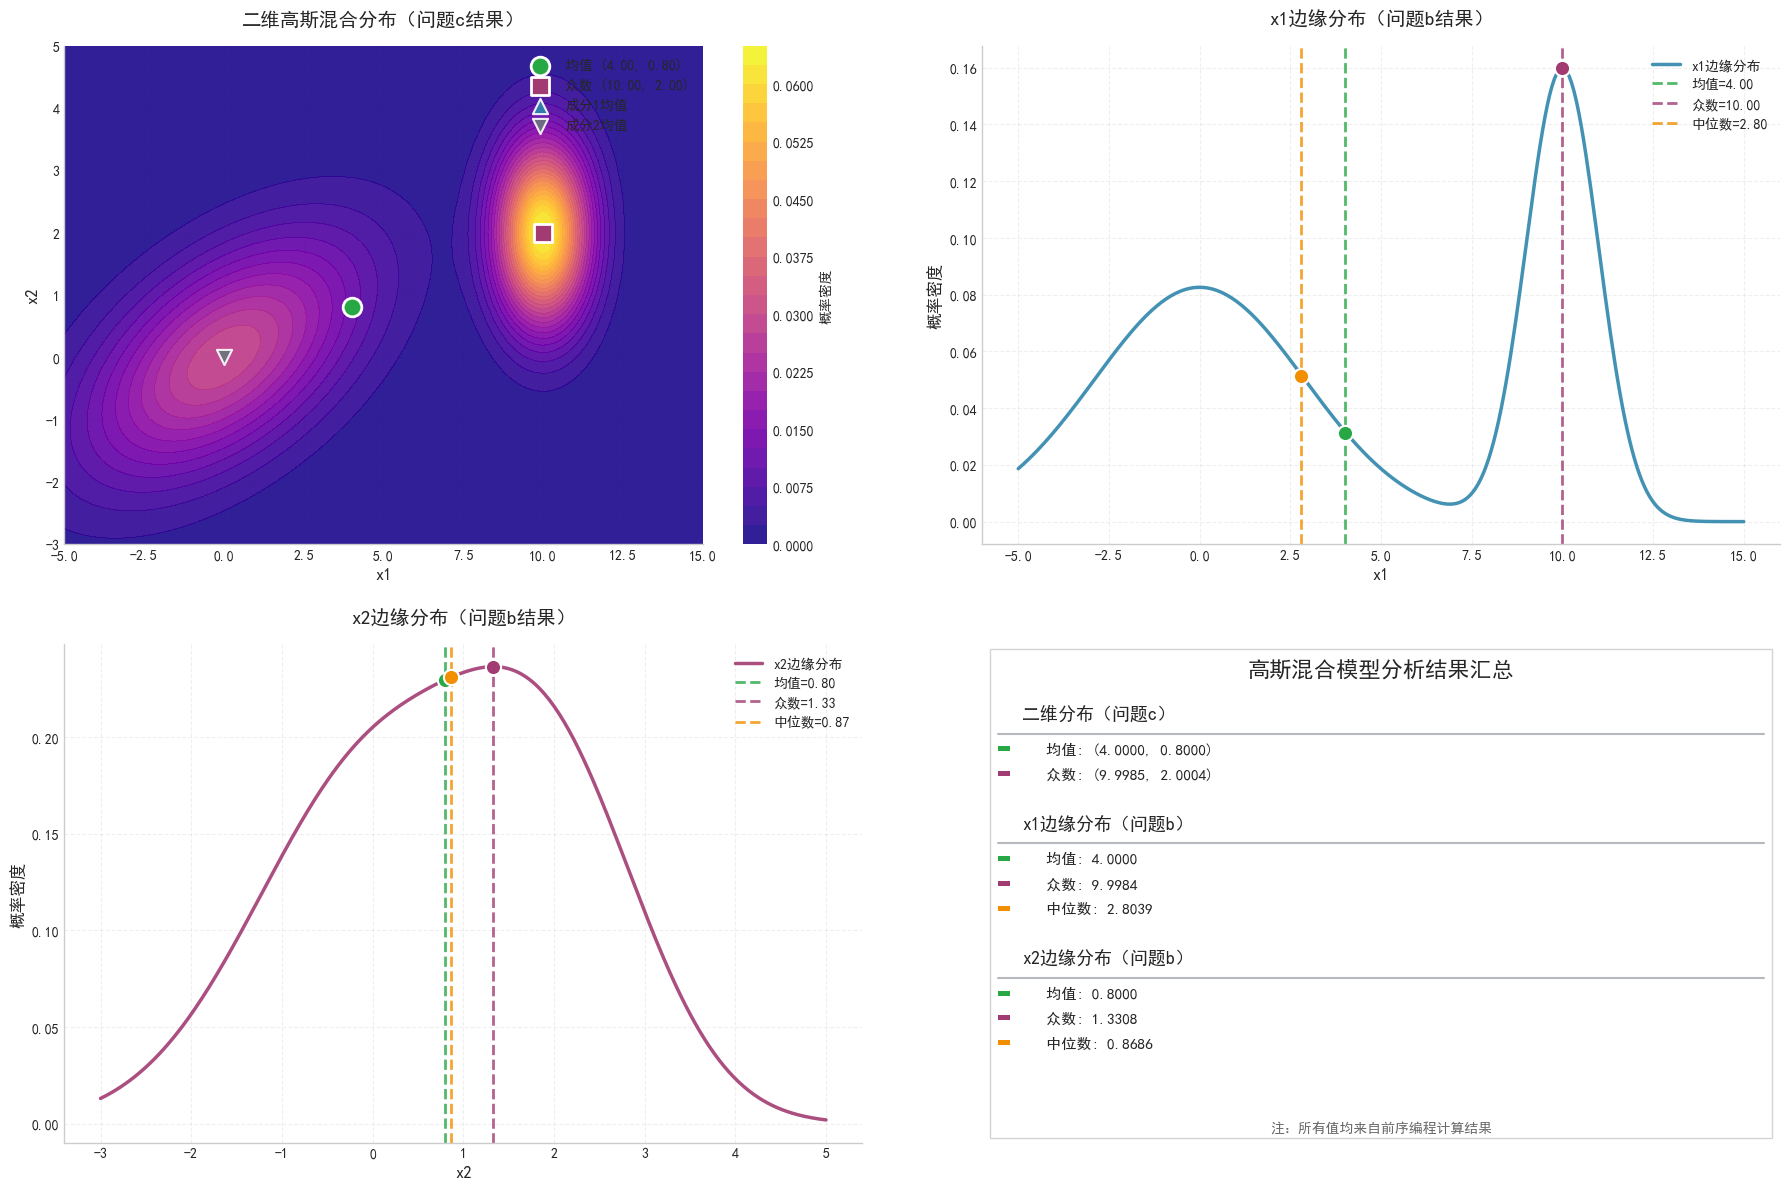

In [59]:
setup_chinese_font()
plt.style.use('seaborn-v0_8-whitegrid')  # 正确的样式名称
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'SimSun']
plt.rcParams['axes.unicode_minus'] = False
# 定义美观的配色方案
colors = {
    'primary': '#2E86AB',     # 主蓝色
    'secondary': '#A23B72',   # 洋红色
    'accent': '#F18F01',      # 橙色
    'neutral': '#6C757D',     # 中性灰
    'success': '#28A745',     # 成功绿
    'background': '#F8F9FA'   # 浅灰背景
}

# 标记点的颜色映射
marker_colors = {
    'mean': colors['success'],      # 均值用绿色
    'mode': colors['secondary'],    # 众数用洋红色
    'median': colors['accent'],     # 中位数用橙色
    'comp1': colors['primary'],     # 成分1用蓝色
    'comp2': colors['neutral']      # 成分2用灰色
}

# 进行可视化
def plot_gaussian_mixture_results_optimized():
    # 创建网格用于二维分布绘图
    x = np.linspace(-5, 15, 100)
    y = np.linspace(-3, 5, 100)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))

    # 计算二维混合高斯的概率密度
    Z = np.zeros(X.shape)
    for i, (weight, mean, cov) in enumerate(zip(weights, means_2d, covs_2d)):
        rv = multivariate_normal(mean, cov)
        Z += weight * rv.pdf(pos)
    
    # 创建图形，使用更现代的布局
    fig = plt.figure(figsize=(18, 12))
    
    # 使用GridSpec进行更精细的布局控制
    gs = GridSpec(2, 2, figure=fig, width_ratios=[1, 1], height_ratios=[1, 1])
    
    # 1. 二维分布等高线图 - 使用更现代的配色
    ax1 = fig.add_subplot(gs[0, 0])
    # 使用plasma色彩映射，更清晰
    contour = ax1.contourf(X, Y, Z, levels=30, cmap=cm.plasma, alpha=0.9)
    cbar = plt.colorbar(contour, ax=ax1, label='概率密度')
    cbar.outline.set_visible(False)  # 移除颜色条边框
    
    # 标记关键点 - 使用新的配色方案
    ax1.scatter(mean_2d[0], mean_2d[1], c=marker_colors['mean'], s=180, marker='o', 
               label=f'均值 ({mean_2d[0]:.2f}, {mean_2d[1]:.2f})', 
               edgecolors='white', linewidth=2, zorder=5)
    ax1.scatter(mode_2d[0], mode_2d[1], c=marker_colors['mode'], s=180, marker='s', 
               label=f'众数 ({mode_2d[0]:.2f}, {mode_2d[1]:.2f})', 
               edgecolors='white', linewidth=2, zorder=5)
    ax1.scatter(means_2d[0][0], means_2d[0][1], c=marker_colors['comp1'], s=120, marker='^', 
               alpha=0.9, label='成分1均值', edgecolors='white', linewidth=1.5)
    ax1.scatter(means_2d[1][0], means_2d[1][1], c=marker_colors['comp2'], s=120, marker='v', 
               alpha=0.9, label='成分2均值', edgecolors='white', linewidth=1.5)
    
    # 美化坐标轴和标题
    ax1.set_xlabel('x1', fontsize=12, fontweight='bold')
    ax1.set_ylabel('x2', fontsize=12, fontweight='bold')
    ax1.set_title('二维高斯混合分布（问题c结果）', fontsize=14, fontweight='bold', pad=15)
    ax1.legend(loc='upper right', framealpha=0.9)
    ax1.grid(True, alpha=0.3, linestyle='--')
    
    # 设置坐标轴样式
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)
    
    # 2. x₁边缘分布 - 使用更现代的线型和配色
    ax2 = fig.add_subplot(gs[0, 1])
    x1_vals = np.linspace(-5, 15, 300)

    # 计算x₁边缘分布的概率密度
    pdf_x1 = np.zeros_like(x1_vals)
    for i, (weight, mean, var) in enumerate(zip(weights_x1, means_x1, vars_x1)):
        pdf_x1 += weight * norm(mean, np.sqrt(var)).pdf(x1_vals)
    
    # 使用更粗的线型和现代配色
    ax2.plot(x1_vals, pdf_x1, color=colors['primary'], linewidth=2.5, 
             label='x1边缘分布', alpha=0.9)

    # 标记关键点 - 使用虚线并增加透明度
    ax2.axvline(x=mean_x1, color=marker_colors['mean'], linestyle='--', 
                alpha=0.8, linewidth=2, label=f'均值={mean_x1:.2f}')
    ax2.axvline(x=mode_x1, color=marker_colors['mode'], linestyle='--', 
                alpha=0.8, linewidth=2, label=f'众数={mode_x1:.2f}')
    ax2.axvline(x=median_x1, color=marker_colors['median'], linestyle='--', 
                alpha=0.8, linewidth=2, label=f'中位数={median_x1:.2f}')
    
    # 在关键点处添加更醒目的标记点
    ax2.scatter([mean_x1], [pdf_x1[np.argmin(np.abs(x1_vals - mean_x1))]], 
               color=marker_colors['mean'], s=120, zorder=5, edgecolors='white', linewidth=1.5)
    ax2.scatter([mode_x1], [pdf_x1[np.argmin(np.abs(x1_vals - mode_x1))]], 
               color=marker_colors['mode'], s=120, zorder=5, edgecolors='white', linewidth=1.5)
    ax2.scatter([median_x1], [pdf_x1[np.argmin(np.abs(x1_vals - median_x1))]], 
               color=marker_colors['median'], s=120, zorder=5, edgecolors='white', linewidth=1.5)
    
    # 美化坐标轴
    ax2.set_xlabel('x1', fontsize=12, fontweight='bold')
    ax2.set_ylabel('概率密度', fontsize=12, fontweight='bold')
    ax2.set_title('x1边缘分布（问题b结果）', fontsize=14, fontweight='bold', pad=15)
    ax2.legend(loc='upper right', framealpha=0.9)
    ax2.grid(True, alpha=0.3, linestyle='--')
    
    # 设置坐标轴样式
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    
    # 3. x₂边缘分布 - 使用协调的配色
    ax3 = fig.add_subplot(gs[1, 0])
    x2_vals = np.linspace(-3, 5, 300)
    
    # 计算x₂边缘分布的概率密度
    pdf_x2 = np.zeros_like(x2_vals)
    for i, (weight, mean, var) in enumerate(zip(weights_x2, means_x2, vars_x2)):
        pdf_x2 += weight * norm(mean, np.sqrt(var)).pdf(x2_vals)
    
    # 使用协调的配色
    ax3.plot(x2_vals, pdf_x2, color=colors['secondary'], linewidth=2.5, 
             label='x2边缘分布', alpha=0.9)
    
    # 标记关键点
    ax3.axvline(x=mean_x2, color=marker_colors['mean'], linestyle='--', 
                alpha=0.8, linewidth=2, label=f'均值={mean_x2:.2f}')
    ax3.axvline(x=mode_x2, color=marker_colors['mode'], linestyle='--', 
                alpha=0.8, linewidth=2, label=f'众数={mode_x2:.2f}')
    ax3.axvline(x=median_x2, color=marker_colors['median'], linestyle='--', 
                alpha=0.8, linewidth=2, label=f'中位数={median_x2:.2f}')
    
    # 在关键点处添加标记点
    ax3.scatter([mean_x2], [pdf_x2[np.argmin(np.abs(x2_vals - mean_x2))]], 
               color=marker_colors['mean'], s=120, zorder=5, edgecolors='white', linewidth=1.5)
    ax3.scatter([mode_x2], [pdf_x2[np.argmin(np.abs(x2_vals - mode_x2))]], 
               color=marker_colors['mode'], s=120, zorder=5, edgecolors='white', linewidth=1.5)
    ax3.scatter([median_x2], [pdf_x2[np.argmin(np.abs(x2_vals - median_x2))]], 
               color=marker_colors['median'], s=120, zorder=5, edgecolors='white', linewidth=1.5)
    
    # 美化坐标轴
    ax3.set_xlabel('x2', fontsize=12, fontweight='bold')
    ax3.set_ylabel('概率密度', fontsize=12, fontweight='bold')
    ax3.set_title('x2边缘分布（问题b结果）', fontsize=14, fontweight='bold', pad=15)
    ax3.legend(loc='upper right', framealpha=0.9)
    ax3.grid(True, alpha=0.3, linestyle='--')
    
    # 设置坐标轴样式
    ax3.spines['top'].set_visible(False)
    ax3.spines['right'].set_visible(False)
    
    # 4. 综合信息展示 - 完全重新设计
    ax4 = fig.add_subplot(gs[1, 1])
    ax4.set_facecolor(colors['background'])  # 设置浅灰色背景
    ax4.axis('off')  # 隐藏坐标轴
    
    # 创建更美观的文本摘要
    title_props = {'fontsize': 16, 'fontweight': 'bold', 'ha': 'center', 'va': 'center'}
    section_props = {'fontsize': 13, 'fontweight': 'bold', 'ha': 'left'}
    value_props = {'fontsize': 11, 'ha': 'left'}
    
    # 添加标题
    ax4.text(0.5, 0.95, '高斯混合模型分析结果汇总', transform=ax4.transAxes, **title_props)
    
    # 添加二维分布结果
    ax4.text(0.05, 0.85, '二维分布（问题c）', transform=ax4.transAxes, **section_props)
    ax4.text(0.08, 0.78, f'均值: ({mean_2d[0]:.4f}, {mean_2d[1]:.4f})', 
             transform=ax4.transAxes, **value_props)
    ax4.text(0.08, 0.73, f'众数: ({mode_2d[0]:.4f}, {mode_2d[1]:.4f})', 
             transform=ax4.transAxes, **value_props)
    
    # 添加x₁边缘分布结果
    ax4.text(0.05, 0.63, 'x1边缘分布（问题b）', transform=ax4.transAxes, **section_props)
    ax4.text(0.08, 0.56, f'均值: {mean_x1:.4f}', transform=ax4.transAxes, **value_props)
    ax4.text(0.08, 0.51, f'众数: {mode_x1:.4f}', transform=ax4.transAxes, **value_props)
    ax4.text(0.08, 0.46, f'中位数: {median_x1:.4f}', transform=ax4.transAxes, **value_props)
    
    # 添加x₂边缘分布结果
    ax4.text(0.05, 0.36, 'x2边缘分布（问题b）', transform=ax4.transAxes, **section_props)
    ax4.text(0.08, 0.29, f'均值: {mean_x2:.4f}', transform=ax4.transAxes, **value_props)
    ax4.text(0.08, 0.24, f'众数: {mode_x2:.4f}', transform=ax4.transAxes, **value_props)
    ax4.text(0.08, 0.19, f'中位数: {median_x2:.4f}', transform=ax4.transAxes, **value_props)
    
    # 添加分隔线
    ax4.axhline(y=0.82, xmin=0.02, xmax=0.98, color=colors['neutral'], alpha=0.5)
    ax4.axhline(y=0.60, xmin=0.02, xmax=0.98, color=colors['neutral'], alpha=0.5)
    ax4.axhline(y=0.33, xmin=0.02, xmax=0.98, color=colors['neutral'], alpha=0.5)
    
    # 添加颜色标识的小方块
    ax4.add_patch(plt.Rectangle((0.02, 0.785), 0.015, 0.01, facecolor=marker_colors['mean'], transform=ax4.transAxes))
    ax4.add_patch(plt.Rectangle((0.02, 0.735), 0.015, 0.01, facecolor=marker_colors['mode'], transform=ax4.transAxes))
    
    ax4.add_patch(plt.Rectangle((0.02, 0.565), 0.015, 0.01, facecolor=marker_colors['mean'], transform=ax4.transAxes))
    ax4.add_patch(plt.Rectangle((0.02, 0.515), 0.015, 0.01, facecolor=marker_colors['mode'], transform=ax4.transAxes))
    ax4.add_patch(plt.Rectangle((0.02, 0.465), 0.015, 0.01, facecolor=marker_colors['median'], transform=ax4.transAxes))
    
    ax4.add_patch(plt.Rectangle((0.02, 0.295), 0.015, 0.01, facecolor=marker_colors['mean'], transform=ax4.transAxes))
    ax4.add_patch(plt.Rectangle((0.02, 0.245), 0.015, 0.01, facecolor=marker_colors['mode'], transform=ax4.transAxes))
    ax4.add_patch(plt.Rectangle((0.02, 0.195), 0.015, 0.01, facecolor=marker_colors['median'], transform=ax4.transAxes))
    
    # 添加脚注
    ax4.text(0.5, 0.02, '注：所有值均来自前序编程计算结果', 
             transform=ax4.transAxes, fontsize=10, ha='center', style='italic', alpha=0.7)
    
    # 添加边框
    ax4.add_patch(plt.Rectangle((0.01, 0.01), 0.98, 0.98, 
                               transform=ax4.transAxes, 
                               fill=False, 
                               edgecolor=colors['neutral'], 
                               alpha=0.3,
                               linewidth=1))
    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.15, hspace=0.2)  # 调整子图间距
    
    return fig

# 运行优化后的可视化函数
fig = plot_gaussian_mixture_results_optimized()

# 保存高质量图片
fig.savefig('optimized_gaussian_mixture_results.png', dpi=300, bbox_inches='tight', 
            facecolor='white', edgecolor='none')

plt.show()

Problem 3

In [61]:
from scipy.spatial.distance import pdist, squareform
from itertools import combinations

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [62]:
# 1. 生成30个点在100维立方体中
np.random.seed(42)  # 设置随机种子以便复现
n_points = 30
dim = 100
points = np.random.uniform(low=-0.5, high=0.5, size=(n_points, dim))

In [63]:
# 2. 计算所有点对之间的距离
distances = pdist(points, metric='euclidean')  # 返回压缩距离矩阵

In [64]:
# 3. 计算所有点对之间的角度（向量夹角）
angles = []
for i, j in combinations(range(n_points), 2):
    vec_i = points[i]  # 从原点到点i的向量
    vec_j = points[j]  # 从原点到点j的向量
    dot_product = np.dot(vec_i, vec_j)
    norm_i = np.linalg.norm(vec_i)
    norm_j = np.linalg.norm(vec_j)
    if norm_i > 0 and norm_j > 0:
        cos_angle = dot_product / (norm_i * norm_j)
        angle = np.arccos(np.clip(cos_angle, -1.0, 1.0))  # 避免数值误差
        angles.append(np.degrees(angle))  # 转换为角度制
    else:
        angles.append(0)  # 如果向量长度为0，角度定义为0

angles = np.array(angles)

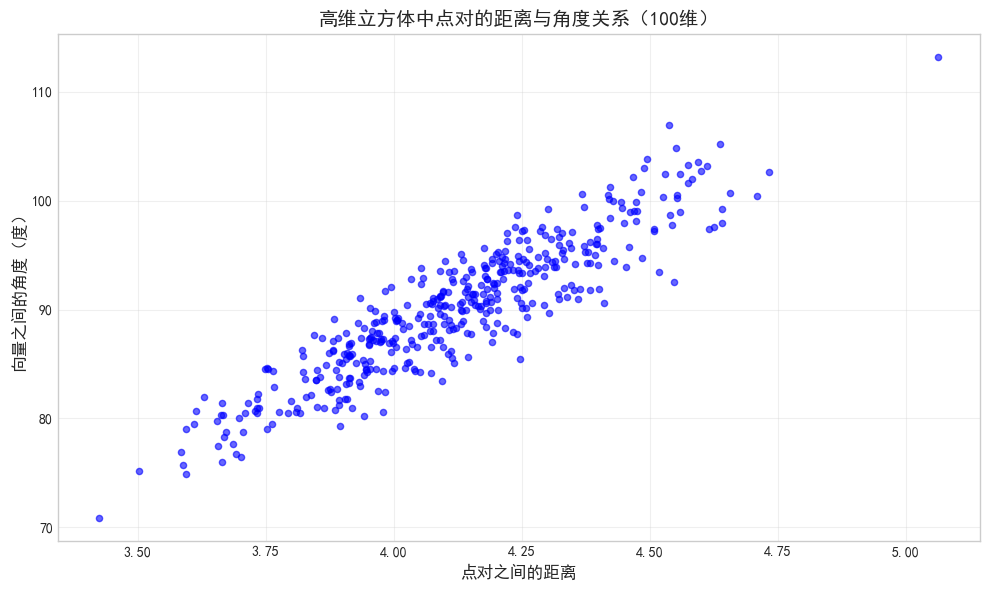

点对数量: 435
距离统计: 均值=4.12, 标准差=0.24
角度统计: 均值=90.08°, 标准差=6.23°


In [ ]:
# 4. 绘制距离与角度的散点图
plt.figure(figsize=(10, 6))
plt.scatter(distances, angles, alpha=0.6, color='blue', s=20)
plt.xlabel('点对之间的距离', fontsize=12)
plt.ylabel('向量之间的角度（度）', fontsize=12)
plt.title('高维立方体中点对的距离与角度关系（100维）', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('high_dimensional_plot.png', dpi=300, bbox_inches='tight')
plt.show()

#输出统计信息
print(f"点对数量: {len(distances)}")
print(f"距离统计: 均值={np.mean(distances):.2f}, 标准差={np.std(distances):.2f}")
print(f"角度统计: 均值={np.mean(angles):.2f}°, 标准差={np.std(angles):.2f}°")

Problem 7

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
import seaborn as sns

# 设置中文字体（可选）
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

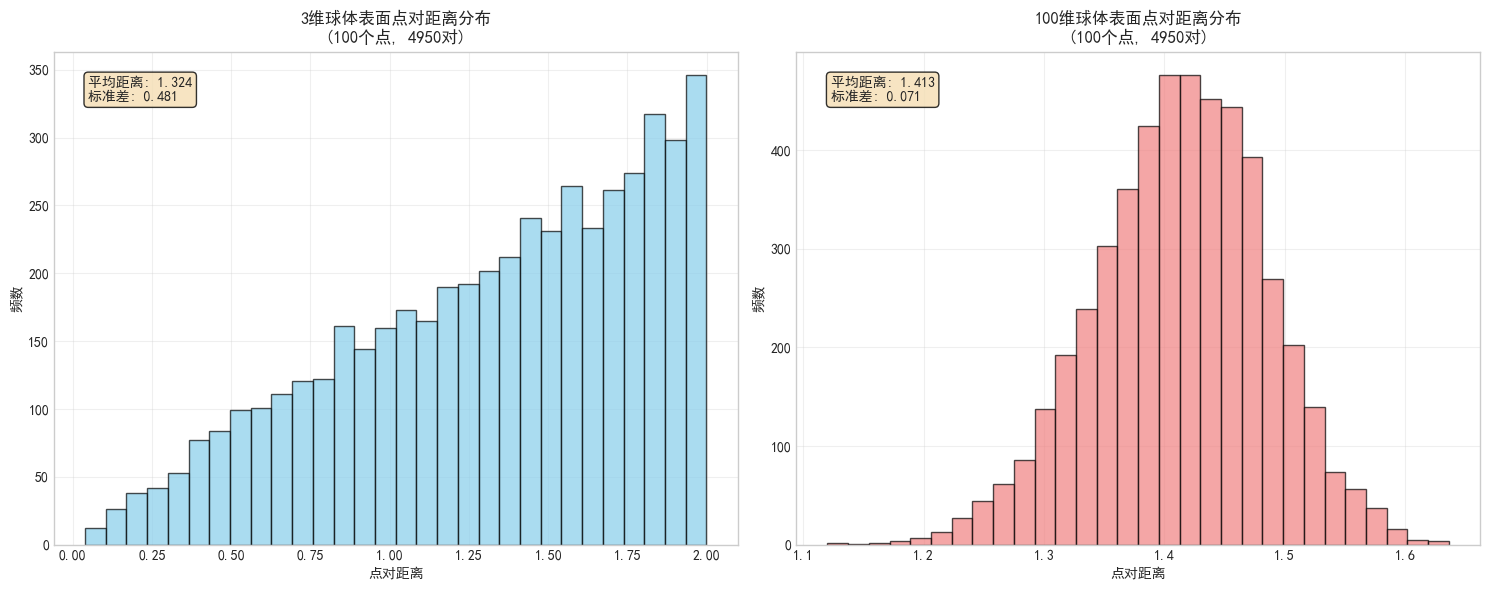

问题7结果分析
3维情况:
  点数量: 100
  点对数量: 4950
  平均距离: 1.3241
  距离标准差: 0.4812
  最小距离: 0.0387
  最大距离: 1.9994

100维情况:
  点数量: 100
  点对数量: 4950
  平均距离: 1.4134
  距离标准差: 0.0712
  最小距离: 1.1202
  最大距离: 1.6364

高维空间现象观察:
  100维平均距离 / 3维平均距离: 1.067
  100维标准差 / 3维标准差: 0.148


In [72]:
def generate_sphere_points(n, dim):
    # 生成服从标准正态分布的随机点
    points = np.random.randn(n, dim)
    # 归一化到单位球体表面
    norms = np.linalg.norm(points, axis=1, keepdims=True)
    points = points / norms
    return points
def calculate_pairwise_distances(points):
    distances = pdist(points, metric='euclidean')
    return distances

# 设置随机种子以确保结果可重现
np.random.seed(42)

# 生成3维球体表面的100个点
points_3d = generate_sphere_points(100, 3)
distances_3d = calculate_pairwise_distances(points_3d)

# 生成100维球体表面的100个点
points_100d = generate_sphere_points(100, 100)
distances_100d = calculate_pairwise_distances(points_100d)

# 创建直方图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 3维情况直方图
ax1.hist(distances_3d, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_xlabel('点对距离')
ax1.set_ylabel('频数')
ax1.set_title('3维球体表面点对距离分布\n(100个点, 4950对)')
ax1.grid(True, alpha=0.3)

# 添加统计信息
ax1.text(0.05, 0.95, f'平均距离: {np.mean(distances_3d):.3f}\n标准差: {np.std(distances_3d):.3f}', 
         transform=ax1.transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

# 100维情况直方图
ax2.hist(distances_100d, bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
ax2.set_xlabel('点对距离')
ax2.set_ylabel('频数')
ax2.set_title('100维球体表面点对距离分布\n(100个点, 4950对)')
ax2.grid(True, alpha=0.3)

# 添加统计信息
ax2.text(0.05, 0.95, f'平均距离: {np.mean(distances_100d):.3f}\n标准差: {np.std(distances_100d):.3f}', 
         transform=ax2.transAxes, verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.savefig('sphere_distances_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# 输出详细统计信息
print("=" * 50)
print("问题7结果分析")
print("=" * 50)
print(f"3维情况:")
print(f"  点数量: 100")
print(f"  点对数量: {len(distances_3d)}")
print(f"  平均距离: {np.mean(distances_3d):.4f}")
print(f"  距离标准差: {np.std(distances_3d):.4f}")
print(f"  最小距离: {np.min(distances_3d):.4f}")
print(f"  最大距离: {np.max(distances_3d):.4f}")

print(f"\n100维情况:")
print(f"  点数量: 100")
print(f"  点对数量: {len(distances_100d)}")
print(f"  平均距离: {np.mean(distances_100d):.4f}")
print(f"  距离标准差: {np.std(distances_100d):.4f}")
print(f"  最小距离: {np.min(distances_100d):.4f}")
print(f"  最大距离: {np.max(distances_100d):.4f}")

print(f"\n高维空间现象观察:")
print(f"  100维平均距离 / 3维平均距离: {np.mean(distances_100d)/np.mean(distances_3d):.3f}")
print(f"  100维标准差 / 3维标准差: {np.std(distances_100d)/np.std(distances_3d):.3f}")

Problem 8

In [73]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

In [74]:
def generate_sphere_points(n, dim, radius=1):
    """在dim维球面上生成n个随机点"""
    # 生成标准正态分布点
    points = np.random.randn(n, dim)
    # 归一化到单位球面
    norms = np.linalg.norm(points, axis=1, keepdims=True)
    points = points / norms
    # 缩放至指定半径
    points = points * radius
    return points

In [75]:
def random_projection(X, k):
    """随机投影到k维子空间"""
    d = X.shape[1]  # 原始维度
    # 生成随机投影矩阵（元素来自N(0, 1/k)）
    R = np.random.randn(d, k) / np.sqrt(k)
    # 投影数据
    X_proj = X @ R
    return X_proj

In [76]:
# 设置随机种子以确保结果可重现
np.random.seed(42)

In [77]:
# 参数设置
n_points = 20        # 点数量
original_dim = 900   # 原始维度
radius = 30          # 球面半径
k_values = [100, 50, 10, 5, 4, 3, 2, 1]  # 目标维度

# 生成900维球面点（半径30）
points_900d = generate_sphere_points(n_points, original_dim, radius)

# 计算原始点对距离
original_distances = pdist(points_900d)
n_pairs = len(original_distances)
print(f"生成 {n_points} 个点在 {original_dim} 维球面上（半径={radius}）")
print(f"点对数量: {n_pairs}")

# 存储结果
results = []

生成 20 个点在 900 维球面上（半径=30）
点对数量: 190


In [78]:
# 对每个k值进行投影和计算
for k in k_values:
    # 随机投影到k维空间
    points_proj = random_projection(points_900d, k)
    
    # 计算投影后的点对距离
    proj_distances = pdist(points_proj)
    
    # 计算差值：|√k * d_original - d_proj|
    differences = np.abs(np.sqrt(k) * original_distances - proj_distances)
    
    # 找到最大差值
    max_diff = np.max(differences)
    
    # 计算最大差值占√k的百分比
    max_diff_percent = (max_diff / np.sqrt(k)) * 100
    
    # 存储结果
    results.append({
        'k': k,
        'max_difference': max_diff,
        'max_diff_percent': max_diff_percent,
        'avg_original_dist': np.mean(original_distances),
        'avg_proj_dist': np.mean(proj_distances)
    })
    
    print(f"k={k}: 最大差值 = {max_diff:.4f}, 占√k的百分比 = {max_diff_percent:.2f}%")


k=100: 最大差值 = 400.0237, 占√k的百分比 = 4000.24%
k=50: 最大差值 = 276.6129, 占√k的百分比 = 3911.90%
k=10: 最大差值 = 116.5818, 占√k的百分比 = 3686.64%
k=5: 最大差值 = 85.2533, 占√k的百分比 = 3812.64%
k=4: 最大差值 = 79.4995, 占√k的百分比 = 3974.98%
k=3: 最大差值 = 64.0354, 占√k的百分比 = 3697.08%
k=2: 最大差值 = 55.0199, 占√k的百分比 = 3890.50%
k=1: 最大差值 = 106.1897, 占√k的百分比 = 10618.97%


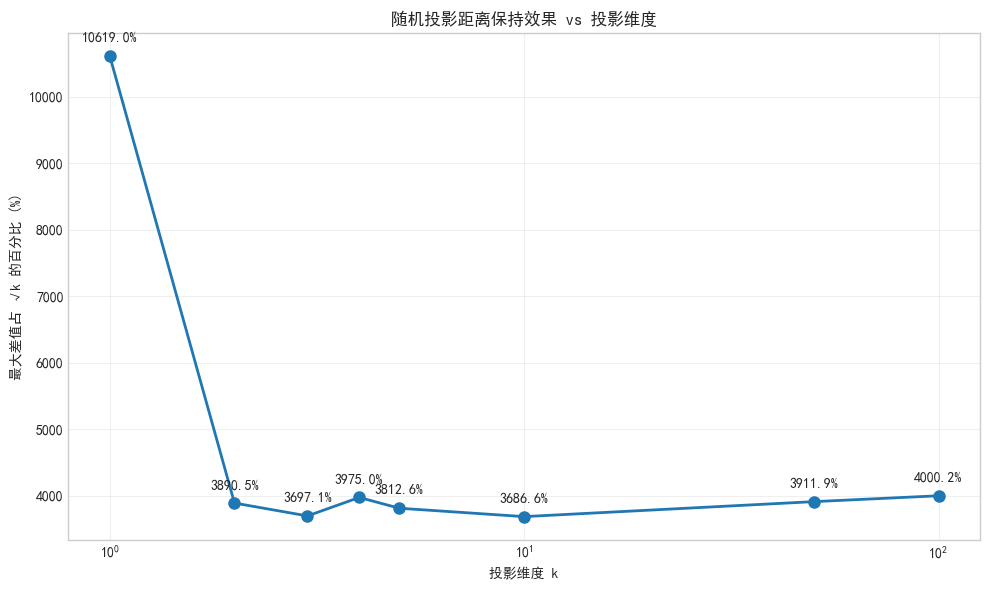


详细结果汇总
   k       最大差值       占√k百分比         原始平均距离         投影平均距离
------------------------------------------------------------
 100   400.0237      4000.24%        42.4791        42.9107
  50   276.6129      3911.90%        42.4791        41.6815
  10   116.5818      3686.64%        42.4791        36.8148
   5    85.2533      3812.64%        42.4791        41.2445
   4    79.4995      3974.98%        42.4791        35.1346
   3    64.0354      3697.08%        42.4791        40.5509
   2    55.0199      3890.50%        42.4791        37.8238
   1   106.1897     10618.97%        42.4791        45.2202


In [80]:
# 可视化结果
plt.figure(figsize=(10, 6))
k_list = [r['k'] for r in results]
percent_list = [r['max_diff_percent'] for r in results]

plt.plot(k_list, percent_list, 'o-', linewidth=2, markersize=8)
plt.xscale('log')
plt.xlabel('投影维度 k')
plt.ylabel('最大差值占 √k 的百分比 (%)')
plt.title('随机投影距离保持效果 vs 投影维度')
plt.grid(True, alpha=0.3)

# 添加数据标签
for i, (k, percent) in enumerate(zip(k_list, percent_list)):
    plt.annotate(f'{percent:.1f}%', (k, percent), 
                 textcoords="offset points", xytext=(0,10), ha='center')

plt.tight_layout()
plt.savefig('random_projection.png', dpi=300, bbox_inches='tight')
plt.show()

# 详细结果表格
print("\n" + "="*60)
print("详细结果汇总")
print("="*60)
print(f"{'k':>4} {'最大差值':>10} {'占√k百分比':>12} {'原始平均距离':>14} {'投影平均距离':>14}")
print("-"*60)
for r in results:
    print(f"{r['k']:4d} {r['max_difference']:10.4f} {r['max_diff_percent']:12.2f}% "
          f"{r['avg_original_dist']:14.4f} {r['avg_proj_dist']:14.4f}")

Problem 9

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
import seaborn as sns

In [82]:
def method_a(n_vectors, target_dim, original_dim=1000):
    """
    方法a: 从高维正交基投影到低维空间
    """
    # 生成original_dim维的正交基（单位矩阵）
    ortho_basis = np.eye(original_dim)
    
    # 选择前n_vectors个正交向量
    if n_vectors > original_dim:
        raise ValueError("n_vectors不能超过original_dim")
    vectors_high_dim = ortho_basis[:n_vectors]
    
    # 生成随机投影矩阵（元素来自N(0, 1/target_dim)）
    projection_matrix = np.random.randn(original_dim, target_dim) / np.sqrt(target_dim)
    
    # 投影到target_dim维空间
    vectors_projected = vectors_high_dim @ projection_matrix
    
    # 归一化为单位向量
    norms = np.linalg.norm(vectors_projected, axis=1, keepdims=True)
    vectors_normalized = vectors_projected / norms
    
    return vectors_normalized

In [83]:
def method_b(n_vectors, dim):
    """
    方法b: 直接生成随机高斯向量并归一化
    """
    # 生成随机高斯向量
    vectors = np.random.randn(n_vectors, dim)
    
    # 归一化为单位向量
    norms = np.linalg.norm(vectors, axis=1, keepdims=True)
    vectors_normalized = vectors / norms
    
    return vectors_normalized

In [84]:
def evaluate_orthogonality(vectors):
    """
    评估向量集的近似正交性
    返回: 平均绝对余弦值, 标准差, 所有余弦值
    """
    n = vectors.shape[0]
    
    # 计算所有向量对之间的余弦值（因为向量已归一化，点积就是余弦值）
    cosine_matrix = vectors @ vectors.T
    
    # 提取上三角部分（不包括对角线）
    cosines = []
    for i in range(n):
        for j in range(i+1, n):
            cosines.append(abs(cosine_matrix[i, j]))
    
    cosines = np.array(cosines)
    return np.mean(cosines), np.std(cosines), cosines


In [85]:
def compare_methods(n_vectors=1000, target_dim=100, n_trials=10):
    """
    多次试验比较两种方法
    """
    results_a = []
    results_b = []
    
    for trial in range(n_trials):
        # 方法a
        vectors_a = method_a(n_vectors, target_dim)
        mean_cos_a, std_cos_a, cosines_a = evaluate_orthogonality(vectors_a)
        results_a.append((mean_cos_a, std_cos_a))
        
        # 方法b
        vectors_b = method_b(n_vectors, target_dim)
        mean_cos_b, std_cos_b, cosines_b = evaluate_orthogonality(vectors_b)
        results_b.append((mean_cos_b, std_cos_b))
    
    return results_a, results_b


In [87]:
# 设置参数
n_vectors = 1000
target_dim = 100
n_trials = 5  # 试验次数，增加以获得更可靠的结果

print("开始比较两种方法...")
print(f"参数: {n_vectors}个向量, {target_dim}维空间, {n_trials}次试验")

# 单次试验的详细比较
print("\n=== 单次试验详细结果 ===")
vectors_a = method_a(n_vectors, target_dim)
vectors_b = method_b(n_vectors, target_dim)

mean_cos_a, std_cos_a, cosines_a = evaluate_orthogonality(vectors_a)
mean_cos_b, std_cos_b, cosines_b = evaluate_orthogonality(vectors_b)

print(f"方法a - 平均绝对余弦值: {mean_cos_a:.6f}, 标准差: {std_cos_a:.6f}")
print(f"方法b - 平均绝对余弦值: {mean_cos_b:.6f}, 标准差: {std_cos_b:.6f}")

# 多次试验比较
print(f"\n=== {n_trials}次试验平均结果 ===")
results_a, results_b = compare_methods(n_vectors, target_dim, n_trials)

mean_a = np.mean([r[0] for r in results_a])
std_a = np.mean([r[1] for r in results_a])
mean_b = np.mean([r[0] for r in results_b])
std_b = np.mean([r[1] for r in results_b])

print(f"方法a - 平均绝对余弦值: {mean_a:.6f} ± {std_a:.6f}")
print(f"方法b - 平均绝对余弦值: {mean_b:.6f} ± {std_b:.6f}")

# 结果判断
if mean_a < mean_b:
    better_method = "方法a（高维投影法）"
    advantage = f"优于方法b约{(mean_b/mean_a - 1)*100:.1f}%"
else:
    better_method = "方法b（随机生成法）"
    advantage = f"优于方法a约{(mean_a/mean_b - 1)*100:.1f}%"

print(f"\n结论: {better_method} {advantage}")


开始比较两种方法...
参数: 1000个向量, 100维空间, 5次试验

=== 单次试验详细结果 ===
方法a - 平均绝对余弦值: 0.079972, 标准差: 0.060046
方法b - 平均绝对余弦值: 0.080055, 标准差: 0.060113

=== 5次试验平均结果 ===
方法a - 平均绝对余弦值: 0.079997 ± 0.060010
方法b - 平均绝对余弦值: 0.079964 ± 0.059987

结论: 方法b（随机生成法） 优于方法a约0.0%


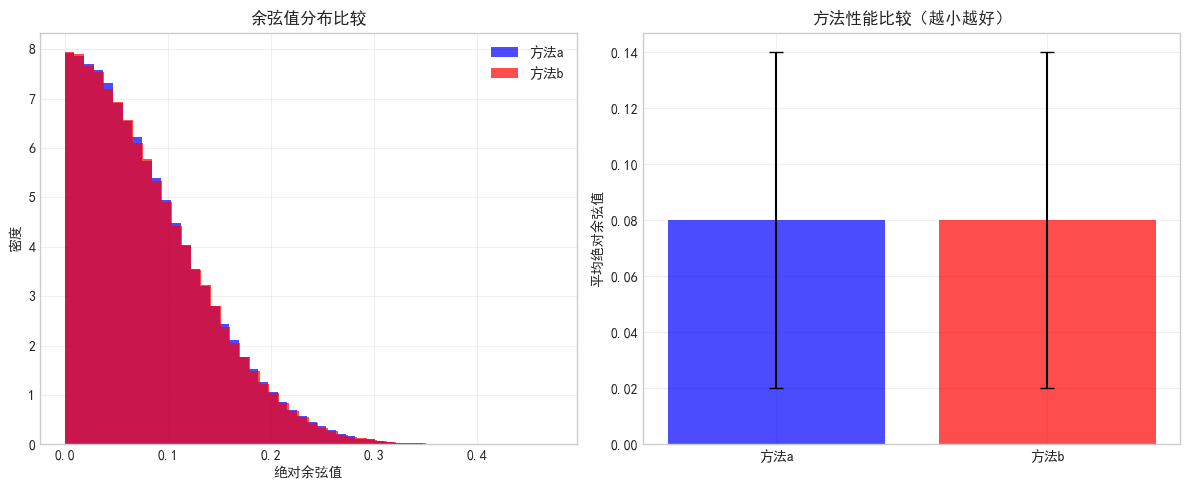


=== 理论分析 ===
理论预期（随机向量）: 平均绝对余弦值 ≈ 0.079788
方法b实测: 0.079964 (偏离理论值 0.2%)


In [89]:
# 可视化结果
plt.figure(figsize=(12, 5))

# 余弦值分布图
plt.subplot(1, 2, 1)
plt.hist(cosines_a, bins=50, alpha=0.7, label='方法a', color='blue', density=True)
plt.hist(cosines_b, bins=50, alpha=0.7, label='方法b', color='red', density=True)
plt.xlabel('绝对余弦值')
plt.ylabel('密度')
plt.title('余弦值分布比较')
plt.legend()
plt.grid(True, alpha=0.3)

# 平均性能比较
plt.subplot(1, 2, 2)
methods = ['方法a', '方法b']
means = [mean_a, mean_b]
stds = [std_a, std_b]

plt.bar(methods, means, yerr=stds, capsize=5, 
        color=['blue', 'red'], alpha=0.7)
plt.ylabel('平均绝对余弦值')
plt.title('方法性能比较（越小越好）')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('projection_comparasion.png', dpi=300, bbox_inches='tight')
plt.show()

# 理论值比较
print("\n=== 理论分析 ===")
# 在d维空间中，两个随机单位向量的期望点积为0，方差为1/d
theoretical_std = 1 / np.sqrt(target_dim)
theoretical_mean = theoretical_std * np.sqrt(2/np.pi)  # 绝对值的期望

print(f"理论预期（随机向量）: 平均绝对余弦值 ≈ {theoretical_mean:.6f}")
print(f"方法b实测: {mean_b:.6f} (偏离理论值 {abs(mean_b-theoretical_mean)/theoretical_mean*100:.1f}%)")
